In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)


Question 1: Correlations between Price and other Features
Question 2: Model formulation to predict Price using Linear Regression Algorithm
Question 3: The most frequent n_grams in Review dataset's comments
Question 4: Distribution of Price, Listing Supply and Listing Demand
The CRISP-DM methodology is used to build this data science project, including:

Business Understanding
Data Understanding
Prepare Data
Model Data
Results

In [2]:
review_df = pd.read_csv('reviews.csv')
listing_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')

## all about reviews

In [3]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in review_df['comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\Vishwakarma/nltk_data'
    - 'C:\\Users\\Vishwakarma\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Vishwakarma\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Vishwakarma\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Vishwakarma\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [5]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [7]:
#reviews_f = [r for r in review_df['comments'] if pd.notnull(r) and get_language(r) == 'english']

In [3]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
listing_df.shape

(3818, 92)

In [5]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
calendar_df.shape

(1393570, 4)

### Analyzing Listing data

In [12]:
#removing columns where missing values are more than 40%
'''
cols_to_remove = []
for col in listing_df.columns:
    if listing_df.isnull().sum()[col]/listing_df.shape[0]>0.4:
        cols_to_remove.append(col)
        
listing_df.drop(cols_to_remove, axis = 1, inplace = True)  
'''

In [6]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [48]:
#Visualizing property prices and outliers in the Boston neighbourhood
#plt.figure(figsize = (12, 6))
#sns.boxplot(x = 'neighbourhood_cleansed', y = 'price',  data = listing_df)
#xt = plt.xticks(rotation=90)

In [47]:
#property price based on the number of bedrooms
#plt.figure(figsize=(10,10))
#sns.heatmap(listing_df.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

In [49]:
#plt.figure(figsize=(10,10))
#sns.heatmap(listing_df.groupby(['city', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

### Feature engg- Price modelling

### Most expensive steet in Boston

### Correlation of price with numerical and categorical column

In [7]:
to_numeric_cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

In [8]:
for col in to_numeric_cols:
    listing_df[col] = listing_df[col].apply(lambda x: str(x).replace('$', '').replace(',', '').split('.')[0])
    listing_df[col] = listing_df[col].astype(float)

In [9]:
numeric_listing_df = listing_df.select_dtypes(include = ['int', 'float64', 'int64', 'float' ])

In [10]:
numeric_listing_df.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,NaN,85.0,NaN,NaN,NaN,NaN,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,NaN,150.0,1000.0,3000.0,100.0,40.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,NaN,975.0,NaN,NaN,1000.0,300.0,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,NaN,100.0,650.0,2300.0,NaN,NaN,1,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,NaN,450.0,NaN,NaN,700.0,125.0,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89


In [11]:
numeric_listing_df.isnull().sum().sort_values(ascending = False)

license                           3818
square_feet                       3721
monthly_price                     2301
security_deposit                  1952
weekly_price                      1809
cleaning_fee                      1030
review_scores_checkin              658
review_scores_accuracy             658
review_scores_value                656
review_scores_location             655
review_scores_cleanliness          653
review_scores_communication        651
review_scores_rating               647
reviews_per_month                  627
bathrooms                           16
bedrooms                             6
host_total_listings_count            2
host_listings_count                  2
beds                                 1
latitude                             0
longitude                            0
accommodates                         0
host_id                              0
scrape_id                            0
guests_included                      0
price                    

In [12]:
cols_to_drop = ['id', 'scrape_id', 'host_id',  'license'  
                , 'square_feet']

In [13]:
numeric_listing_df.drop(cols_to_drop, axis = 1, inplace = True)

C:\Users\Vishwakarma\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
numeric_listing_df.drop('host_total_listings_count', axis = 1, inplace = True)

In [15]:
numeric_listing_df.isnull().sum().sort_values(ascending = False)/numeric_listing_df.shape[0]

monthly_price                     0.602672
security_deposit                  0.511262
weekly_price                      0.473808
cleaning_fee                      0.269775
review_scores_checkin             0.172342
review_scores_accuracy            0.172342
review_scores_value               0.171818
review_scores_location            0.171556
review_scores_cleanliness         0.171032
review_scores_communication       0.170508
review_scores_rating              0.169460
reviews_per_month                 0.164222
bathrooms                         0.004191
bedrooms                          0.001572
host_listings_count               0.000524
beds                              0.000262
minimum_nights                    0.000000
guests_included                   0.000000
calculated_host_listings_count    0.000000
availability_30                   0.000000
availability_60                   0.000000
availability_90                   0.000000
price                             0.000000
availabilit

In [16]:
#dropping columns having more than 30% of missing values
cols_to_drop = ['monthly_price', 'weekly_price', 'security_deposit', 'cleaning_fee']
numeric_listing_df.drop(cols_to_drop, inplace = True, axis = 1)

In [17]:
#To impute most frequent value in place og nan 
numeric_listing_df[['bathrooms','bedrooms','beds']] = pd.DataFrame(SimpleImputer(missing_values=float('nan'), 
                                                         strategy="most_frequent", 
                                                         axis=0).fit_transform(numeric_listing_df),
                                                         columns = numeric_listing_df.columns)

TypeError: __init__() got an unexpected keyword argument 'axis'

In [18]:
numeric_listing_df.isnull().sum().sort_values(ascending = False)/numeric_listing_df.shape[0]

review_scores_checkin             0.172342
review_scores_accuracy            0.172342
review_scores_value               0.171818
review_scores_location            0.171556
review_scores_cleanliness         0.171032
review_scores_communication       0.170508
review_scores_rating              0.169460
reviews_per_month                 0.164222
bathrooms                         0.004191
bedrooms                          0.001572
host_listings_count               0.000524
beds                              0.000262
availability_90                   0.000000
calculated_host_listings_count    0.000000
availability_30                   0.000000
maximum_nights                    0.000000
minimum_nights                    0.000000
guests_included                   0.000000
price                             0.000000
availability_365                  0.000000
number_of_reviews                 0.000000
accommodates                      0.000000
longitude                         0.000000
latitude   

In [ ]:
'''
def categorical_variable_analysis(data, variable, response):
    
    #INPUT
    #data - pandas dataframe, holding all the columns 
    #variable - str, the categorical variable of interest
    #response - str, the response variable
    
    #OUTPUT
    #None
    
    order = listing_df.groupby(variable)[response].median().sort_values(ascending=False).index
    sns.boxplot(y=listing_df[response], x=listing_df[variable], order=order)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    plt.title('{}'.format(variable), fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.xlabel('', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
# categorical variables of interest that may affect price
cat_cols_index = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 
                  'cancellation_policy', 'host_is_superhost', 'instant_bookable', 
                  'is_location_exact', 'require_guest_phone_verification',
                  'require_guest_profile_picture']

plt.figure(figsize = (12, 27))
for i in range(len(cat_cols_index)):
    cat_col_index = cat_cols_index[i]
    plt_index = i+1
    plt.subplot(5,2,plt_index)
    categorical_variable_analysis(data = listing_df, variable=cat_col_index, response='price') 
    plt.subplots_adjust(hspace=0.75, wspace=0.2)
    
    if cat_col_index in ['host_is_superhost', 'instant_bookable', 'is_location_exact', 
                         'require_guest_phone_verification', 'require_guest_profile_picture']:
        locs, labels = plt.xticks()
        labels = [item.get_text() for item in labels]
#         print (labels)
        if labels ==  ['f', 't']:
            plt.xticks(np.arange(2), ('No', 'Yes'))
        else:
            plt.xticks(np.arange(2), ('Yes', 'No'))
            
'''

In [19]:
corr = numeric_listing_df.corr()

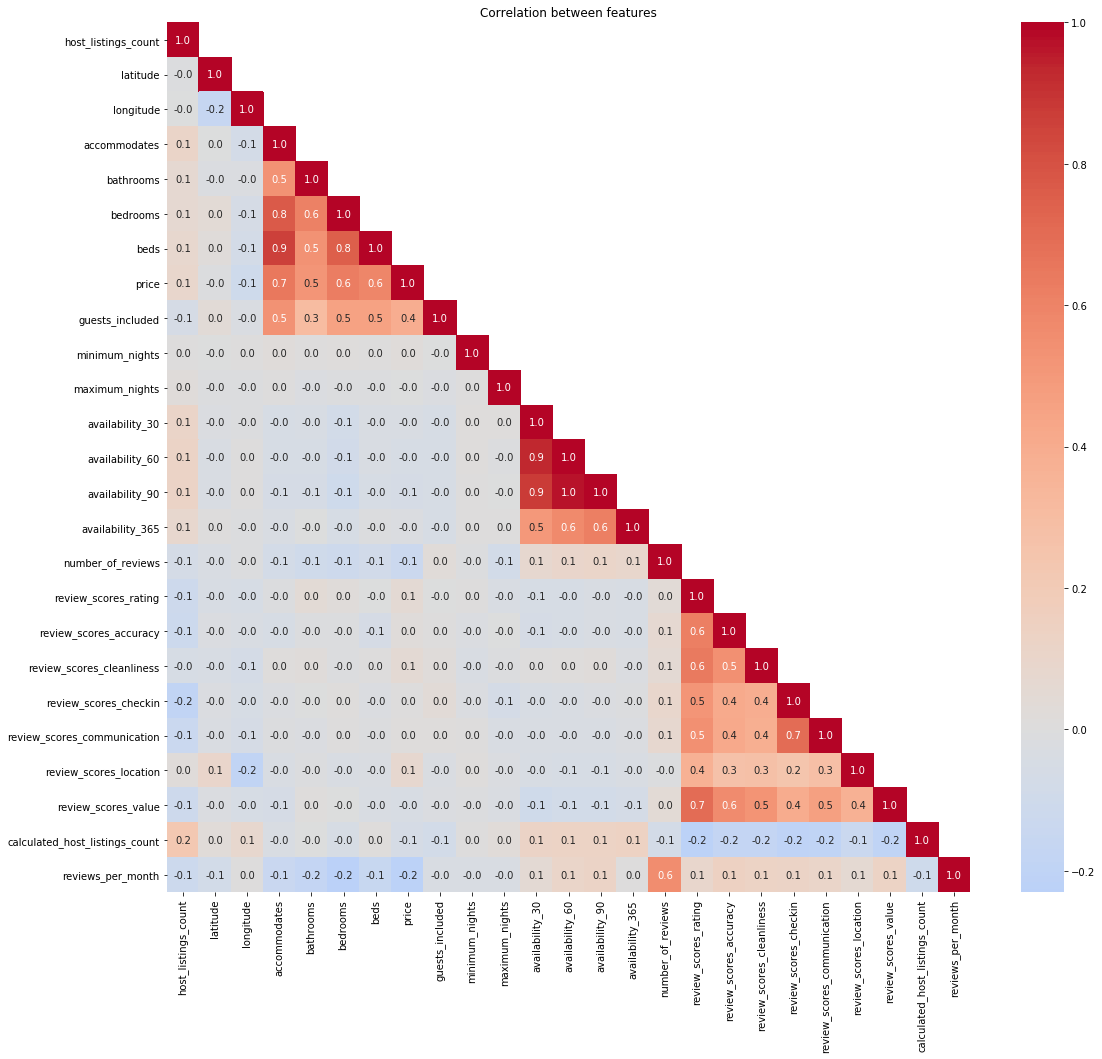

In [20]:
plt.figure(figsize = (18, 16))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
plt.title('Correlation between features')
sns.heatmap(corr, annot=True, fmt = '.1f', cmap = 'coolwarm', center = 0, mask = mask)

In [21]:
corr['price'].sort_values(ascending = False)

price                             1.000000
accommodates                      0.652218
bedrooms                          0.627720
beds                              0.589525
bathrooms                         0.516424
guests_included                   0.392875
host_listings_count               0.093962
review_scores_location            0.075069
review_scores_rating              0.055551
review_scores_cleanliness         0.054357
review_scores_accuracy            0.019026
minimum_nights                    0.017297
review_scores_communication       0.012990
review_scores_checkin             0.007877
maximum_nights                   -0.003336
latitude                         -0.008904
availability_365                 -0.015550
availability_30                  -0.037653
review_scores_value              -0.041776
availability_60                  -0.049336
calculated_host_listings_count   -0.054092
availability_90                  -0.058810
longitude                        -0.102420
number_of_r

In [22]:
cat_listings_df = listing_df.select_dtypes(include = 'object')

In [23]:
cat_listings_df.head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$5.00,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0.00,today,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wirele

In [24]:
cat_listings_df['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [25]:
cat_listings_df['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [26]:
cat_listings_df.loc[:, 'host_response_time'] = cat_listings_df.loc[:,'host_response_time'].fillna('within a few hours')

C:\Users\Vishwakarma\Anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [27]:
cat_listings_df.loc[:, 'market'] = cat_listings_df.loc[:, 'market'].fillna('Boston')

In [28]:
cat_listings_df.loc[:, 'market'] = cat_listings_df.loc[:, 'market'].fillna('Boston')

In [29]:
cat_listings_df.loc[:, 'property_type'] = cat_listings_df.loc[:, 'property_type'].fillna('Apartment')

In [30]:
cat_cols = []
for cols in cat_listings_df.columns:
    if (cat_listings_df[cols].nunique()>1) & (cat_listings_df[cols].nunique()<20):
        #print(cols, ':', cat_listings_df[cols].nunique())
        cat_cols.append(cols)

In [31]:
cat_listings_df[cat_cols].isnull().sum()

host_response_time                    0
host_acceptance_rate                773
host_is_superhost                     2
host_has_profile_pic                  2
host_identity_verified                2
neighbourhood_group_cleansed          0
city                                  0
state                                 0
smart_location                        0
is_location_exact                     0
property_type                         0
room_type                             0
bed_type                              0
instant_bookable                      0
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
dtype: int64

In [32]:
cat_cols

['host_response_time',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'smart_location',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [33]:
cat_df = pd.get_dummies(data = cat_listings_df[cat_cols], columns = cat_cols)
cat_df.head()

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_acceptance_rate_0%,host_acceptance_rate_100%,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,"city_Ballard, Seattle",city_Phinney Ridge Seattle,city_Seattle,city_Seattle,city_West Seattle,city_seattle,city_西雅图,state_WA,state_wa,"smart_location_Ballard, Seattle, WA","smart_location_Phinney Ridge Seattle, WA","smart_location_Seattle , WA","smart_location_Seattle, WA","smart_location_West Seattle, WA","smart_location_seattle, wa","smart_location_西雅图, WA",is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0
1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1
2,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0
3,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0
4,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0


In [34]:
numeric_listing_df.isnull().sum().sort_values(ascending = False)

review_scores_checkin             658
review_scores_accuracy            658
review_scores_value               656
review_scores_location            655
review_scores_cleanliness         653
review_scores_communication       651
review_scores_rating              647
reviews_per_month                 627
bathrooms                          16
bedrooms                            6
host_listings_count                 2
beds                                1
availability_90                     0
calculated_host_listings_count      0
availability_30                     0
maximum_nights                      0
minimum_nights                      0
guests_included                     0
price                               0
availability_365                    0
number_of_reviews                   0
accommodates                        0
longitude                           0
latitude                            0
availability_60                     0
dtype: int64

In [35]:
df_merge = pd.concat([numeric_listing_df, cat_df], axis = 1)

In [36]:
df_merge

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_acceptance_rate_0%,host_acceptance_rate_100%,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,"city_Ballard, Seattle",city_Phinney Ridge Seattle,city_Seattle,city_Seattle,city_West Seattle,city_seattle,city_西雅图,state_WA,state_wa,"smart_location_Ballard, Seattle, WA","smart_location_Phinney Ridge Seattle, WA","smart_location_Seattle , WA","smart_location_Seattle, WA","smart_location_West Seattle, WA","smart_location_seattle, wa","smart_location_西雅图, WA",is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0
1,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1
2,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,975.0,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0
3,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,100.0,1,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0
4,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,450.0,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,

In [37]:
df_merge.isnull().sum().sort_values(ascending = False)[:10]

review_scores_accuracy         658
review_scores_checkin          658
review_scores_value            656
review_scores_location         655
review_scores_cleanliness      653
review_scores_communication    651
review_scores_rating           647
reviews_per_month              627
bathrooms                       16
bedrooms                         6
dtype: int64

In [38]:
df_merge_nw = df_merge.dropna(axis = 0)

In [39]:
df_merge_nw.shape

(3140, 105)

In [70]:
Q1 = df_merge_nw['price'].quantile(0.25)
Q3 = df_merge_nw['price'].quantile(0.75)
IQR = Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
df_merge1 = df_merge_nw[(df_merge_nw['price']>Lower_Whisker)&(df_merge_nw['price']<Upper_Whisker)]

In [71]:
df_merge_nw.shape, df_merge1.shape

((3140, 105), (2951, 105))

In [72]:
y = df_merge1['price']
X = df_merge1.drop('price', axis = 1)

In [41]:
#y = df_merge['price']
#X = df_merge.drop('price', axis = 1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from xgboost import XGBRegressor

In [44]:
#pip install xgboost

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [74]:
model = XGBRegressor(n_estimators = 1000, max_depth = 9, eta = 0.08, colsample_bytree = 0.8)

In [75]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.08, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0799999982,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [76]:
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

In [78]:
mean_squared_error(y_pred, y_test)

940.7639500879836

In [79]:
mean_absolute_error(y_pred, y_test)

21.80491557177755

In [80]:
y_pred.mean()

109.29509

In [81]:
def Predictive_Model(estimator):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print('R_squared:', metrics.r2_score(y_test, y_pred))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    plt.figure(figsize=(10,5))
    sns.distplot(y_test, hist=True, kde=False)
    sns.distplot(y_pred, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.xlim(0,)

R_squared: 0.6350094847815846
Square Root of MSE: 30.67187555543325


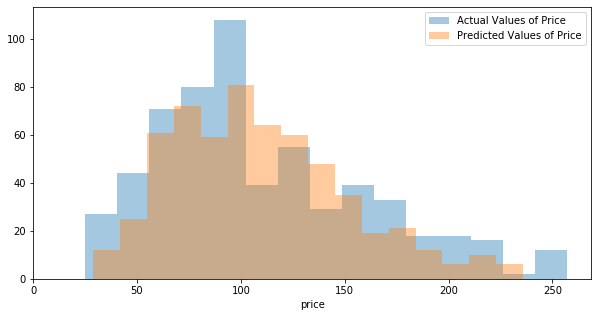

In [82]:
Predictive_Model(model)

The R² of the linear regression is 0.5582, which means that about 55% of the variance of the housing prices in the data can be predicted by the model. 

R_squared: 0.600094191292029
Square Root of MSE: 32.105423293827414


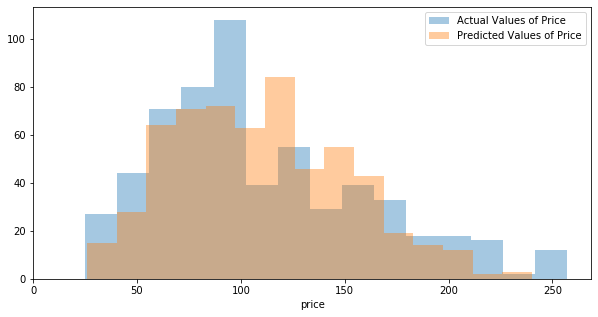

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Predictive_Model(lr)

R_squared: 0.5858231645324439
Square Root of MSE: 32.67325835336161


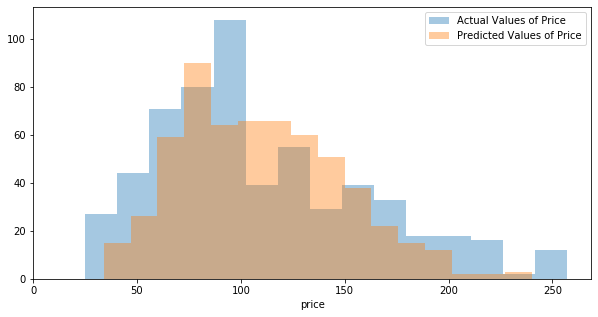

In [84]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=100)
Predictive_Model(rr)

R_squared: 0.08368808628323121
Square Root of MSE: 48.59831488656654


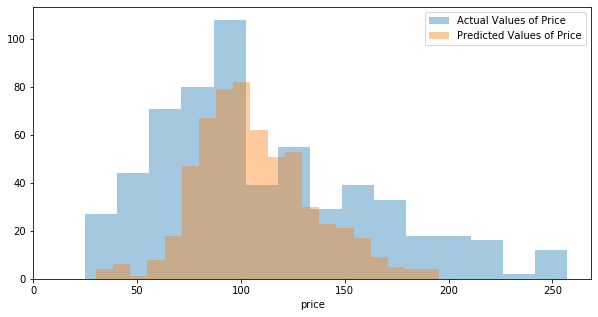

In [85]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
Predictive_Model(knn)

R_squared: 0.24618849108324437
Square Root of MSE: 44.078918056493386


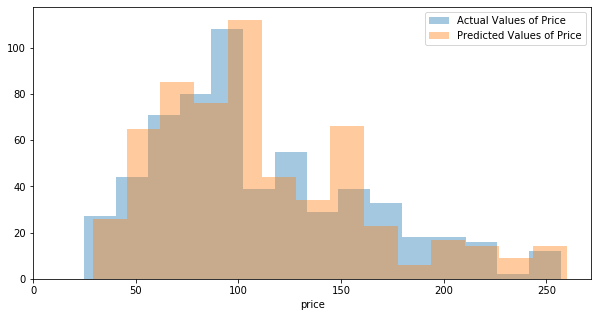

In [86]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, random_state=0)
Predictive_Model(dt)

Cross Validation(CV) is a re-sampling procedure when the amount of data is limited. This randomly splits the entire data into K-folds, fit a model using (K-1) folds, validates the model using the remaining fold, and then evaluates the performance through metrics. After this, CV repeats this whole process until every K-fold is used as the testing set. The average of the K-number of scores of a metric is the final performance score for the model.

Grid-search is the process of tuning hyper parameters to find the optimal values of the parameters for a model. The prediction results can vary depending on the specific values for the parameters. The grid-search technique applies all the possible candidates for the parameters to find out the optimal one to give the best predictions for the model.

In [104]:
y_test.mean()

123.94108280254777

In [121]:
d = {'y_test':y_test, 'y_pred': y_pred}
result = pd.DataFrame(data = d)
result

,y_test,y_pred
3516,75.0,135.605011
3614,125.0,175.298431
1273,200.0,167.156784
1475,110.0,126.487427
3636,450.0,271.496796
...,...,...
1619,110.0,144.752792
808,88.0,91.022957
2752,139.0,108.298912
3009,105.0,97.347618


In [109]:
y_pred.max()

540.96265

In [115]:
result.rename(columns= ['price', 'pred'], columns)

RangeIndex(start=0, stop=1, step=1)

In [125]:
result[result['y_test'] == 999.0]

,y_test,y_pred
1208,999.0,134.902542


In [135]:
listing_df[listing_df.index==1208]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1208,3345341,https://www.airbnb.com/rooms/3345341,20160104002432,2016-01-04,100% Walk Score 1-BR Downtown,100% Walk Score close to the Convention Center...,The space seeks to feel like home while giving...,100% Walk Score close to the Convention Center...,none,This neighborhood is AWESOME! We are: - 1 stre...,"To accommodate between 3-4 guests, there is an...","Public transit is 1 small street away. Car2go,...",https://a1.muscache.com/ac/pictures/77601201/6...,https://a1.muscache.com/im/pictures/77601201/6...,https://a1.muscache.com/ac/pictures/77601201/6...,https://a1.muscache.com/ac/pictures/77601201/6...,3906464,https://www.airbnb.com/users/show/3906464,Amy,2012-10-17,"New York, New York, United States",When it comes to hospitality as an Airbnb host...,within a few hours,100%,100%,f,https://a0.muscache.com/ac/users/3906464/profi...,https://a0.muscache.com/ac/users/3906464/profi...,Belltown,2.0,2.0,"['phone', 'facebook', 'google', 'linkedin', 'r...",t,f,"8th Avenue, Seattle, WA 98101, United States",Belltown,Belltown,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.615379,-122.335259,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Elevato...",NaN,999.0,NaN,NaN,95.0,85.0,1,$10.00,1,31,today,t,0,0,0,0,2016-01-04,54,2014-06-23,2015-06-28,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.89


In [200]:
# Outlier removal 

def remove_outliers(df):
    QR1 = df.quantile(0.25)
    QR3 = df.quantile(0.75)
    IQR = QR3 - QR1
    lower_limit = QR1 - IQR * 1.5
    upper_limit = QR3 + IQR * 1.5
    
    df = df[~(df<lower_limit) & ~(df>upper_limit)]
    return df

In [171]:
df_merge_nw

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_acceptance_rate_0%,host_acceptance_rate_100%,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,"city_Ballard, Seattle",city_Phinney Ridge Seattle,city_Seattle,city_Seattle,city_West Seattle,city_seattle,city_西雅图,state_WA,state_wa,"smart_location_Ballard, Seattle, WA","smart_location_Phinney Ridge Seattle, WA","smart_location_Seattle , WA","smart_location_Seattle, WA","smart_location_West Seattle, WA","smart_location_seattle, wa","smart_location_西雅图, WA",is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0
1,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1
2,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,975.0,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0
4,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,450.0,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0
5,1.0,47.630525,-122.366174,2,1.0,1.0,1.0,120.0,1,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.45,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,.

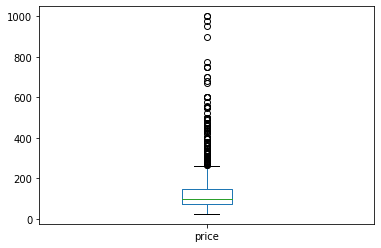

In [180]:
df_merge_nw['price'].plot(kind = 'box')

In [207]:
df = df_merge_nw['price']
QR1 = df.quantile(0.25)
QR3 = df.quantile(0.75)
IQR = QR3 - QR1
lower_limit = QR1 - IQR * 1.5
upper_limit = QR3 + IQR * 1.5

df_merge_nw_updated = df_merge_nw[~(df<lower_limit) & ~(df>upper_limit)]

In [202]:
#df_merged_Removed_outlier = remove_outliers(df_merge_nw['price'])

In [208]:
df_merge_nw_updated

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_acceptance_rate_0%,host_acceptance_rate_100%,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,"city_Ballard, Seattle",city_Phinney Ridge Seattle,city_Seattle,city_Seattle,city_West Seattle,city_seattle,city_西雅图,state_WA,state_wa,"smart_location_Ballard, Seattle, WA","smart_location_Phinney Ridge Seattle, WA","smart_location_Seattle , WA","smart_location_Seattle, WA","smart_location_West Seattle, WA","smart_location_seattle, wa","smart_location_西雅图, WA",is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0
1,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1
5,1.0,47.630525,-122.366174,2,1.0,1.0,1.0,120.0,1,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.45,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0
6,1.0,47.636605,-122.368519,2,1.0,1.0,1.0,80.0,1,3,14,20,49,71,346,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.46,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0
7,5.0,47.640161,-122.375856,2,1.0,1.0,1.0,60.0,1,2,7,22,42,42,100,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,5,4.73,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,..

In [209]:
y = df_merge_nw_updated['price']
X = df_merge_nw_updated.drop('price', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = XGBRegressor(n_estimators = 1000, max_depth = 7, eta = 0.1, colsample_bytree = 0.8)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_pred, y_test)

mean_absolute_error(y_pred, y_test)

21.805902406850645

In [214]:
d1 = {'y_test': y_test, 'y_pred': y_pred}
result_updated = pd.DataFrame(data = d)

In [215]:
result_updated

,y_test,y_pred
3516,75.0,135.605011
3614,125.0,175.298431
1273,200.0,167.156784
1475,110.0,126.487427
3636,450.0,271.496796
...,...,...
1619,110.0,144.752792
808,88.0,91.022957
2752,139.0,108.298912
3009,105.0,97.347618


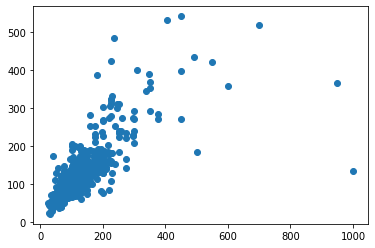

In [225]:
plt.scatter(result_updated['y_test'], result_updated['y_pred'])

In [168]:
import plotly

In [82]:
import plotly.express as px
import pandas as pd

#fig = px.scatter_geo(listing_df, lat='latitude', lon='longitude', hover_data= ['price', 'city'])
#fig.update_layout(title = 'airbnb', title_x=0.5)
#fig.show()

In [170]:
listing_df.city.value_counts().head()

Boston              3381
Roxbury Crossing      24
Somerville            19
Jamaica Plain         18
Brookline             18
Name: city, dtype: int64

In [179]:
listing_df.groupby('city')['price'].sum().sort_values(ascending = False).head()

city
Boston           597724.0
Charlestown        3938.0
Jamaica Plain      3205.0
Cambridge          3190.0
Brookline          2446.0
Name: price, dtype: float64

In [180]:
listing_df.groupby('city')['price'].mean().sort_values(ascending = False).head()

city
South End, Boston       450.000000
Charlestown             262.533333
Boston (Charlestown)    200.000000
Roslindale, Boston      200.000000
Cambridge               199.375000
Name: price, dtype: float64

In [194]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [197]:
calendar_df.price.value_counts()

$150.00      20752
$65.00       17518
$75.00       16249
$100.00      15499
$200.00      14326
             ...  
$2,656.00        1
$1,089.00        1
$1,047.00        1
$1,074.00        1
$1,797.00        1
Name: price, Length: 1246, dtype: int64

In [190]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


Q1. How the prices are related with other features such as location, number of rooms, or other deciding features

Q2. Monthly earning of the airbnb owners

Q3. effect of reviews on the earniings

Q3. frequency with which its been taken by customers


In [31]:
calendar_df

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [32]:
calendar_df.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [35]:
calendar_df.groupby(['listing_id'])['available'].value_counts()

listing_id  available
3353        t            249
            f            116
5506        t            344
            f             21
6695        t            324
                        ... 
14928333    f             26
14933380    f            284
            t             81
14933461    f            215
            t            150
Name: available, Length: 6388, dtype: int64